Pour lancer le notebook, aller dans un terminal et taper `jupyter notebook`. Dans le navigateur, ouvrir le fichier CS2TP.ipynb que vous aurez au préalable enregistré. Ensuite, à vous de découvrir `jupyter notebook`, par exemple :
http://dichotomies.fr/2016/informatique/info1/cours/debuter-avec-les-notebooks/

Dans ce TP, nous allons utiliser 2 modules spécifiques au cours de data mining :

- `statsmodels` pour les modèles linéaires gaussiens et généralisés,
- `sklearn`pour les modèles d'apprentissage.

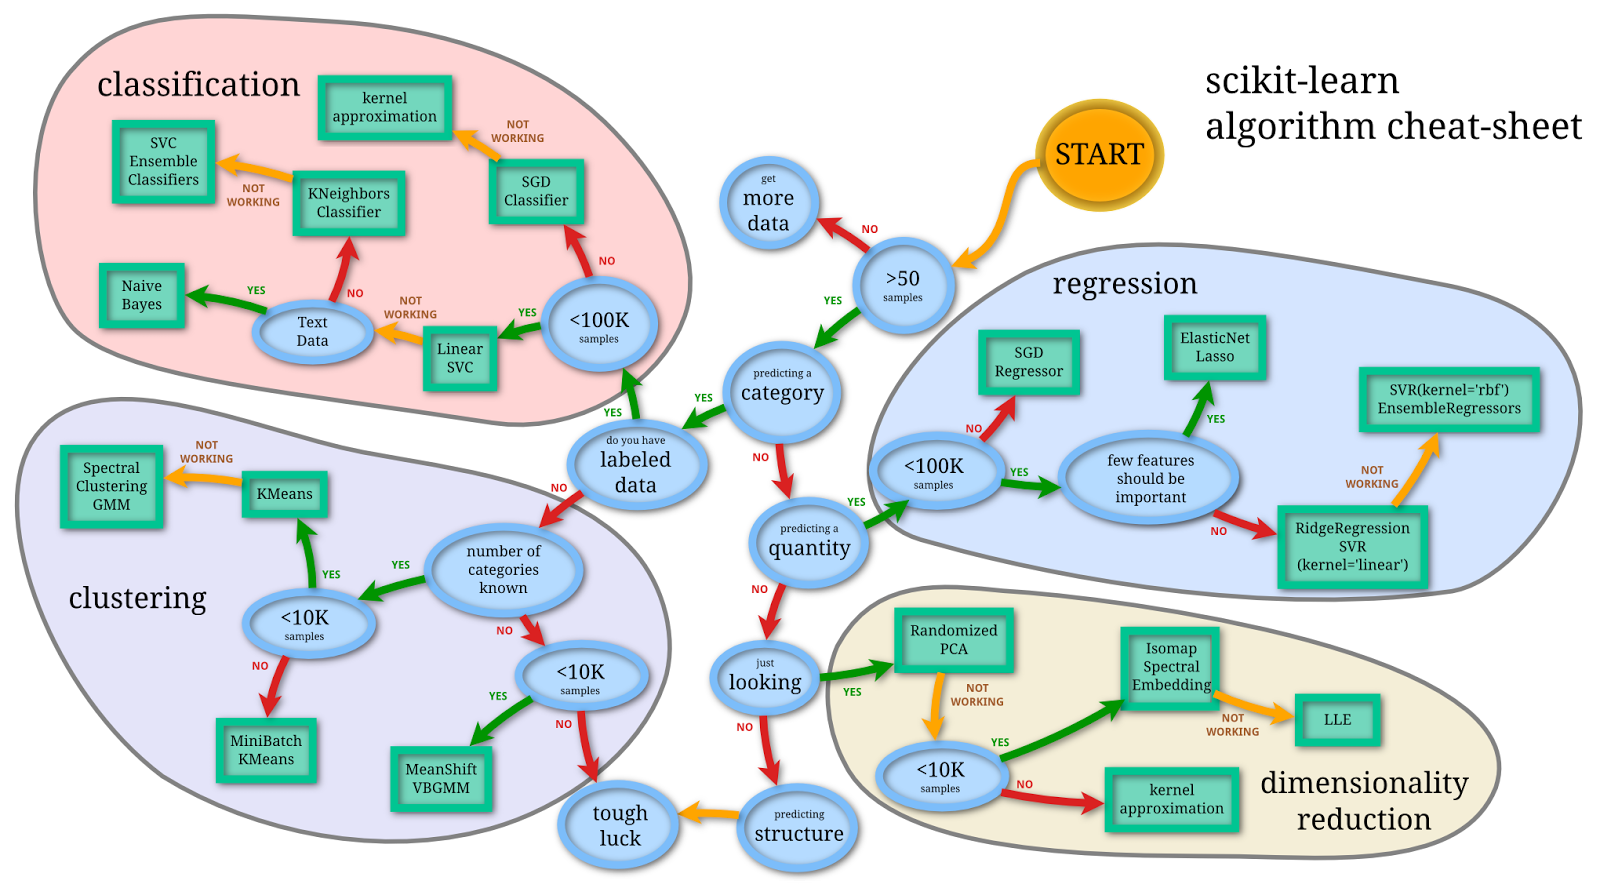

In [44]:
from IPython.display import Image
Image(filename="/home/labatte/Bureau /MASTER DS 1 ADD/CS2- RD4 AFD/sklearn.png",width=700,height=400)

On utilisera aussi les modules `pandas`et `seaborn` pour les manipulations de données statistiques et leurs exploitations graphiques. 

Par convention:
- $X$ représente l'array des données explicatives, 
- $y$ la variable à expliquer, 
- $data$ le data frame panda $[X,y]$, 
- X_train, X_test y_train y_test les échantillons d'appentissage et de test,
- y_pred les valeurs prédites par le modèle

# Exercice 1 : Prise en main de sklearn


On simule deux nuages de points en 3 dimension. Dans chaque nuage de points, les observations  sont des vecteurs gaussiens de loi:

- nuage 1 : $\mu1=(0,0,0)$ et $\Sigma_1$= $\begin{bmatrix}
3 & 1 & 0.5 \\
1 & 2 & 0.5 \\
0.5 & 0.5 & 1 \\
\end{bmatrix}$

- nuage 2 : $\mu2=(3,3,3)$ et $\Sigma_2=\Sigma_1$.

## Question 1 :
Les instruction suivantes permettent la simulation de ces deux nuages. Interpréter les.


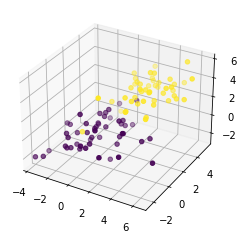

In [4]:
import matplotlib.pyplot as plt #graphique
import numpy as np # calcul matriciel
import pandas as pd # création de data.frame
import numpy.random as npr # stochastique
import scipy.stats as stats # stat
from math import pi,log,sqrt # fonction math
import seaborn as sns # graphiques avancés avec pandas


''' création de 2 nuages gaussiens en 3 dimensionsde même matrices de covariances
 1 : $\mu_1$ = [0,0,0] $\Sigma_1=$[[3,1,0.5],[1,2,0.5],[0.5,0.5,1]]
 2 : $\mu_1$ = [3,3,3] $\Sigma_2=\Sigma_1=$
'''
mu1=np.array([0,0,0])
mu2=np.array([3,3,3])
S=np.array([[3,1,0.5],[1,2,0.5],[0.5,0.5,1]])
A=np.linalg.cholesky(S)
A.dot(A.T)
X1=npr.randn(50,3).dot(A.T)+mu1
g1=np.mean(X1,0);g1
W1=np.cov(X1,rowvar=False);W1
X2=npr.randn(50,3).dot(A.T)+mu2
g2=np.mean(X2,0);g2
W2=np.cov(X2,rowvar=False);W2
X=np.concatenate((X1, X2))
y=np.concatenate((np.ones(50),np.ones(50)*2));y
from mpl_toolkits.mplot3d import Axes3D # graphique 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], X[:,2], c=y)

## Question 2 :
On réalise maintenant l'analyse discriminante des données. Combien de variables discriminantes peut-on obtenir? Interpréter les commandes suivantes. Déterminer la fonction discriminante.

Text(0.5, 1.0, 'Score LD1')

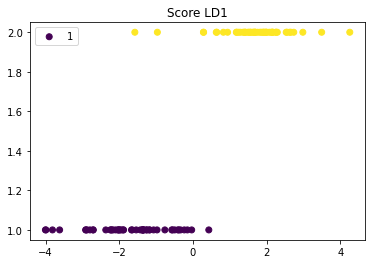

In [5]:
''' AFD et visualisation LD1
'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X,y) #ajustement du modèle
LD1=lda.transform(X) # création des LD avec le modèle
plt.scatter(LD1,y,c=y) #stripchart
plt.legend(['1','2'])
plt.title('Score LD1')

## Question 3 :
On évalue maintenant la qualité de prédiction. Interpréter les instructions suivantes

In [6]:
y_pred=lda.predict(X)
from sklearn.metrics import confusion_matrix,roc_curve,auc
print(confusion_matrix(y,y_pred))
lda.score(X,y)

[[49  1]
 [ 2 48]]


0.97

 ## Question 4 :
On réalise maintenant l'analyse en composantes principales des données pour une repésentation en 2D. Interpréter les commandes suivantes. 

PCA(n_components=2)
[2.40345364 0.39895879]


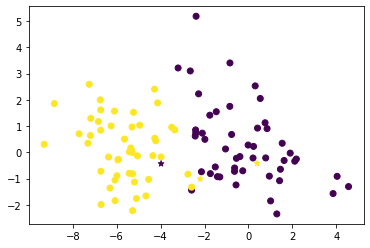

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=2)
print(pca.fit(scale(X)))
print(pca.explained_variance_)
PC=pca.transform(X) #permet de calculeer les composantes principales (F1,F2 dans le cours)
#plt.scatter(PC[:,0],PC[:,1],c=y)
plt.scatter(PC[y==y_pred,0],PC[y==y_pred,1],c=y[y==y_pred])
plt.scatter(PC[y!=y_pred,0],PC[y!=y_pred,1],c=y[y!=y_pred],marker='*') #les étooiles représentent les points mal classés

## Question 5:
reprendre l'exercice dans les deux cas suivants:
- cas 1 : modifier $\mu_2$,
- cas 1 : les matrices de variance covariance ne sont plus égales,
- cas 2 : 3 groupes au lieu de de deux.

# Exercice 2 : un exemple concret : wine.

L'exemple wine décrit à l'aide de 13 variables quantitatives 3 classes de vins. Utiliser `wine['DESCR']` pour les légendes. 

## Question 1 : Données
Interpréter les instructions suivantes. Déterminer la variable initiale discriminant le plus les classes et représenter là.


          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

/tmp/ipykernel_8605/2479708015.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[L][data.target==i],
/tmp/ipykernel_8605/2479708015.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[L][data.target==i],
/tmp/ipykernel_8605/2479708015.py:23: UserWarning: 

`distplot` is a deprecate

Text(0.5, 1.0, 'Variable alcohol, F=135')

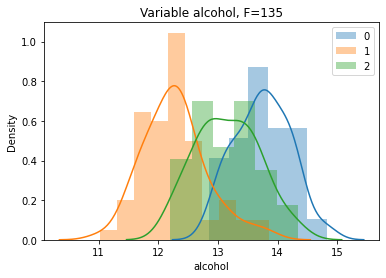

In [12]:
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy.random as npr
import scipy.stats as stats
from math import pi,log,sqrt
import seaborn as sns
from sklearn import datasets
wine = datasets.load_wine()
# print(wine['DESCR'])
X=wine.data
y=wine.target
#création d'un data frame pour les graphiques et statsmodels
data = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
data['target']=pd.Categorical(wine['target']) #transformation en facteur
print(data.describe()) #equivalent de summary en R
#wine['feature_names']
L='alcohol' #L = variable étudiée
for i in data.target.unique():
    F,p=stats.f_oneway(data[L][data.target==0],data[L][data.target==1],\
    data[L][data.target==2])
    sns.distplot(data[L][data.target==i],
                 kde=1,label='{}'.format(i))
plt.legend()
plt.title('Variable {}, F={}'.format(L,round(F)))

## Question 2 : ANOVA
Interpréter les résultats obtenus pour l'anova.

In [14]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
lm=ols('alcohol~ C(target)',data=data).fit()
print(lm.summary())
print(sm.stats.anova_lm(lm, typ=2))
print(lm.diagn)
print(stats.shapiro(lm.resid))
print(stats.levene(lm.resid,data['target'])) # équivalent bartlett
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data['alcohol'], data['target'])
mc_lm = mc.tukeyhsd()
print(mc_lm)

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     135.1
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           3.32e-36
Time:                        10:15:16   Log-Likelihood:                -131.87
No. Observations:                 178   AIC:                             269.7
Df Residuals:                     175   BIC:                             279.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.7447      0.067    206.

## Question 3 : Echantillon d'apprentissage

A l'aide de la fonction `train_test_split`, construire un échantillon d'apprentissage et un échantillon de test en proportion (0.75,0.25) en respectant les proportions des classes.


In [28]:
from sklearn.model_selection import train_test_split
?train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
len(y_train)
#len(X_train)

133

## Question 4 : Modèle lda, analyse discriminante linéaire

Construire le modèle lda et calculer sa matrice de confusion et son score sur l'échantillon d'apprentissage et de test.


Text(0.5, 1.0, 'Score LD1')

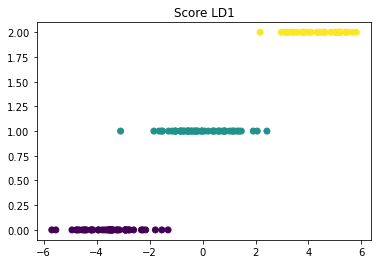

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train) #ajustement du modèle
LD1=lda.transform(X_train) # création des LD avec le modèle
plt.scatter(LD1[:,0],y_train,c=y_train) #stripchart
plt.title('Score LD1')

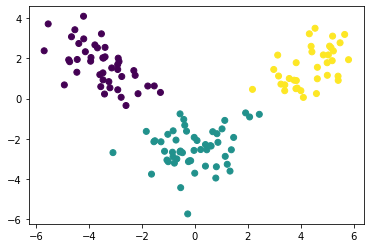

In [35]:
plt.scatter(LD1[:,0],LD1[:,1],c=y_train)

In [36]:
y_pred=lda.predict(X_test)
print(confusion_matrix(y_test,y_pred))
lda.score(X_test,y_test)

[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]


1.0

## Question 5 : Modèle knn, plus proches voisins
Estimer le modèle knn et déterminer la valeur du nombre de voisin optimisant la prévision sur l'échantillon test. On étudiera le scrore de la méthode en fonction de différentes valeurs de k, 2 à 12 par exemple pour sélectionner le meilleur choix. En déduire les performances du modèle.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
?KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)
y_pred=neigh.predict(X_test)
print(confusion_matrix(y_test,y_pred))
neigh.score(X_test,y_test)

[[13  0  2]
 [ 1 13  4]
 [ 1  5  6]]


0.7111111111111111

## Question 6 : Modèle tree, arbre décisionnel

Utiliser un arbre de décision pour réaliser la prédiction.
Pour obtenir un graphique de l'arbre, il faut taper 

`dot -Tpdf wine.dot -o wine.pdf`

dans un terminal et dans le répertoire de wine.dot. 
Evaluer les performances du modèle.


Que fait arbre2? Quel modèle choisir?

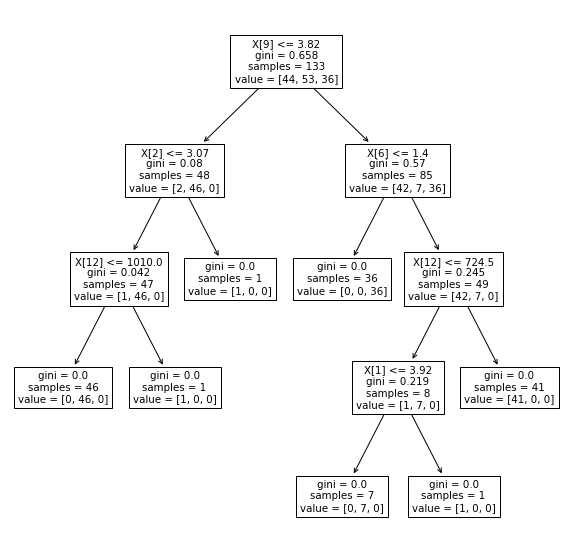

In [45]:
from sklearn import tree
arbre = tree.DecisionTreeClassifier()
arbre.fit(X_train,y_train)
#with open("wine.dot", 'w') as f:
#f = tree.export_graphviz(arbre, out_file=f)
plt.figure(figsize=(10,10))
tree.plot_tree(arbre)
plt.show()
arbre2=tree.DecisionTreeClassifier(max_depth=2)

In [46]:
y_pred=arbre.predict(X_test)
print(confusion_matrix(y_test,y_pred))
arbre.score(X_test,y_test)

[[14  1  0]
 [ 0 18  0]
 [ 0  1 11]]


0.9555555555555556

## Question 7 : modèle gnb, Naive Bayes
Le modèle repose sur l'hypothèse d'indépendance des variables explicatives, simplifiant fortement le modèle et son estimation. Les modèles les plus classiques sont les modèles gaussiens et multinomiaux.
Construire le modèle et l'évaluer.

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
gnb.score(X_test,y_test)

[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]


1.0

# Exercice 3 : Régression logistique
The datasets, `pima.txt` consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. L'objectif est de prédire / expliquer l’occurrence du diabète (variable à prédire) à partir des caractéristiques des personnes (âge, IMC, etc.) 
http://www.stat.nthu.edu.tw/~swcheng/Teaching/stat5230/data/pima.txt
http://www.grappa.univ-lille3.fr/~torre/Recherche/Experiments/Datasets/
https://eric.univ-lyon2.fr/~ricco/cours/slides/PJ%20-%20machine%20learning%20avec%20scikit-learn.pdf

In [81]:
pima= pd.read_table("/users/2023/ds1/119008303/Documents/pima.txt",sep="\t",header=0)
print(pima.columns)
print(pima.dtypes)
#le format pandas est utilie pour statsmodels ou les graphiques
#pour sklearn il faut un format array
data = pima.to_numpy()
X=data[:,0:8]
y=data[:,8]


Index(['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'diabetes', 'age', 'test'],
      dtype='object')
pregnant       int64
glucose        int64
diastolic      int64
triceps        int64
insulin        int64
bmi          float64
diabetes     float64
age            int64
test           int64
dtype: object


## Question 1 : régression logistique explicative
Interpréter les résultats ci-dessous. L'étude peut être complétée par une étude descriptive variable par variable.

In [55]:
import statsmodels.discrete.discrete_model as sm
glm = sm.Logit(y,X)
result = glm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 06 Apr 2023   Pseudo R-squ.:                 0.05922
Time:                        11:55:06   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1284      0.029      4.484      0.000       0.072       0.185
x2             0.0129      0.003      4.757      0.000       0.008       0.018
x3            -0.0303      0.005     -6.481      0.000      -0.039      -0.021
x4             0.0002      0.006      0.032      0.974      -0.012       0.012
x5             0.0007      0.001      0.942      0.346      -0.001       0.002
x6            -0.0048      0.011     -0.449      0.653      -0.026       0.016
x7             0.3203      0.240      1.335      0.182      -0.150       0.790
x8            -0.0156      0.008     -1.852      0.064      -0.032       0.001
==============================================================================
"""

## Question 2 : Sélection de variables
On procède à la sélection des variables pertinentes. Quelles sont les variables retenues? Expliquer le principe de sélection. Comparer les résultats avec le modèle complet (X) et optimisé (Xs).

In [74]:
from sklearn.linear_model import LogisticRegression
GLM= LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=40)
GLM.fit(X_train,y_train)
y_pred=GLM.predict(X_test)
print(confusion_matrix(y_test,y_pred))
GLM.score(X_test,y_test)

[[102  17]
 [ 37  36]]


0.71875

## Question 3 : Qualité du modèle

Calculer la matrice de confusion sur l'échantillon d'apprentissage et de test avec le modèle complet et simplifié. Calculer les taux d'erreurs. 

## Question 4 : Courbe ROC
On construit au préalable un score en fonction duquel les FP et FN sont calculés. Ici on utilise $P(1|X)$. Construire les courbes ROC des deux  modèles et comparer les résultats. 

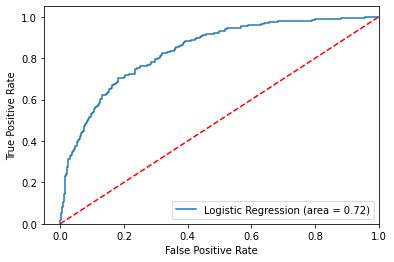

In [84]:
#Construction d'un score, P(1|x)
score = GLM.predict_proba(X)[:,1]


#Courbe ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
glm_roc_auc = roc_auc_score(y, GLM.predict(X))
fpr, tpr, thresholds = roc_curve(y, score)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % glm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
